In [5]:
import sys
sys.path.append('../')
import os
from codes.model.unet_network import unet
from codes.data.load_data import load_files
from codes.data.utils import evaluate_model,predict_model

import numpy as np
import datetime

In [2]:
#Prepare dataset
files = "C:\\dataset\\Test"
experiment = "C:\\"
volumn = 17
ratio = 0.7
list_dataset = load_files(src_folder=files,split=ratio, filenamepattern="*.png",dataset_volume = volumn,flag=1) 


In [3]:
#u-net
train = list_dataset[0]
test = list_dataset[1]
val = list_dataset[2]
unet_model = unet(input_size=(256,256,3),num_classes=1)
batch_size = 1
total_batch = (volumn * 0.7)//batch_size
train = train.shuffle(int(volumn * ratio))
train = train.batch(batch_size)
val = val.batch(batch_size)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        dropout[0][0]                    
______________________________________________________________________________________________

In [5]:
from codes.data.utils import train_model 
epoches = 2
total_batch = (volumn * ratio)//batch_size
train_losses,val_losses = train_model(model=unet_model
                                ,dataset_train=train, dataset_val=val
                                , epochs = epoches
                                , print_interval=1 
                                , total_batch=total_batch
                                , train_vol=int(volumn * ratio)
                                , filename="C:\\test.h5")

[Epoch 0/2] [Batch 0/11] [T loss: 2.296028, acc:   0%] time: 0:00:00.716442
[Epoch 0/2] [Batch 1/11] [T loss: 2.264348, acc: 100%] time: 0:00:01.193561
[Epoch 0/2] [Batch 2/11] [T loss: 1.904100, acc: 100%] time: 0:00:01.660195
[Epoch 0/2] [Batch 3/11] [T loss: 2.429290, acc: 100%] time: 0:00:02.148659
[Epoch 0/2] [Batch 4/11] [T loss: 2.268522, acc:   0%] time: 0:00:02.615039
[Epoch 0/2] [Batch 5/11] [T loss: 2.224989, acc: 100%] time: 0:00:03.067042
[Epoch 0/2] [Batch 6/11] [T loss: 2.258216, acc:   0%] time: 0:00:03.542216
[Epoch 0/2] [Batch 7/11] [T loss: 2.248441, acc:   0%] time: 0:00:04.006462
[Epoch 0/2] [Batch 8/11] [T loss: 2.225699, acc: 100%] time: 0:00:04.459051
[Epoch 0/2] [Batch 9/11] [T loss: 2.178777, acc: 100%] time: 0:00:04.915631
[Epoch 0/2] [Batch 10/11] [T loss: 2.226742, acc: 100%] time: 0:00:05.373097
[Epoch 0/2] [Batch 0/11] [E loss: 2.385188, acc:   0%] time: 0:00:05.514636
[Epoch 0/2] [Batch 1/11] [E loss: 2.385357, acc:   0%] time: 0:00:05.563530
[Epoch 0/2]

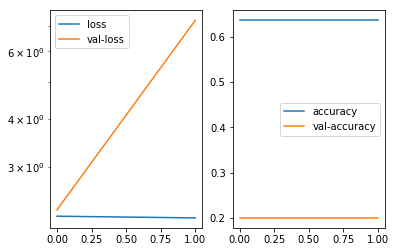

In [6]:
from codes.data.utils import plotting
plotting(train_losses,val_losses)

In [8]:
from codes.data.utils import predict_model_svm
predict_model_svm(unet_model,test,"c:\\test.pkl")

------------------------Predict model-----------------------------
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
Average testing accuracy = 0.0


In [1]:
from tensorflow.keras.applications import VGG16

In [2]:
vgg = VGG16(include_top=True)


In [3]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
from codes.model.pix2pix_network import Pix2Pix

In [7]:
pixmodel = Pix2Pix()

In [8]:
pixmodel.generator.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 128, 128, 64) 3136        input_4[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_4 (LeakyReLU)       (None, 128, 128, 64) 0           conv2d_5[0][0]                   
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 64, 64, 128)  131200      leaky_re_lu_4[0][0]              
____________________________________________________________________________________________

In [9]:
import sys
sys.path.append('../')

from codes.data.load_data import load_files
from codes.model.vgg_network import VGG19
vgg = VGG(rows=256, cols=256, channels=3,num_classes=1, pretrained=0,is_svm=1)


In [11]:
for i, layer in enumerate(vgg.vgg.layers):
    print(i,layer)

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x0000005C730055F8>
1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000005C3ECC6C50>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000005C3ECC6E48>
3 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000005C3ECD0E80>
4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000005C3ECDA2E8>
5 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000005C3ECED8D0>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000005C3ED04B00>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000005C3ED1D320>
8 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000005C3FEE4E10>
9 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000005C3FEF6780>
10 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000005C3FF0FB00>
11 <tensorflow.python.keras.layers.convolutional.Conv2D object

In [10]:
from tensorflow.keras.applications import VGG19

model = VGG19(include_top=False, weights='imagenet', input_shape=[256,256,3])

In [5]:
len(model.layers)

19

In [11]:
for i, layer in enumerate(model.layers):
    print(i,layer)

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fad6c0add30>
1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fad5879b940>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fad587b47b8>
3 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fad587b4f98>
4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fad5873c5c0>
5 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fad5874da20>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fad5875f9e8>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fad5876e198>
8 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fad586f95f8>
9 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fad5870a5c0>
10 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fad5871a8d0>
11 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fad5872ec18>
12 <tensorflow.python.ke

In [ ]:
from tensorflow.keras.applications import MobileNet
model = MobileNet(include_top=False)

/usr/local/lib/python3.5/dist-packages/keras_applications/mobilenet.py:208: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [1]:
import random
random.randint(1,101)

45